## Ход работы:
В этом блокноте я работаю с данными и вывожу гистограммы, понимаю, что не везде можно использовать только столбчатые. Наблюдаю важность Ящиков с усами, а также здесь есть примеры с нахождением разных переменных (более важных) в контексте.

## Разбор данных
ценность домов в Айове 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
AH = pd.read_csv('AmesHousing.txt', sep="\t", header=0, index_col=False)

In [3]:
AH.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
print(AH.shape)
print(len(AH))

(2930, 82)
2930


In [5]:
AH.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [6]:
AH.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


Номинальная - за сколько сек. пробежали (нельзя делать операции)
порядковая -  какое место заняли бегуны
количественная школа - числа

столбец - характеристика
строчка - объект - наблюдение

Децили - делят на 10 частей

# Гистограммы

In [7]:
import matplotlib
import matplotlib.pyplot as plt 

matplotlib.style.use('ggplot')

%matplotlib inline

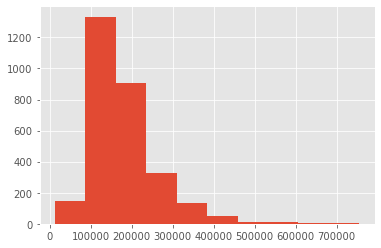

In [8]:
AH['SalePrice'].hist();

Веротяность - доля исхода это процент
Гистограма - хотим найти плотность распределения
(разглядывание площадей и смотрим на выбросы)

50-е Годы Форд Мустанг для молодежи. Был сильный ажиотаж. Но аналитики посмотрели распределение по возрасту, появилась еще одна кагорта стареющих плейбоев гистограма выглядила так - 
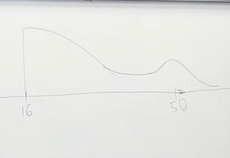

Это может повлиять на ваши инсайты, например нужны сиденья помягче, машина должна быть комфортной

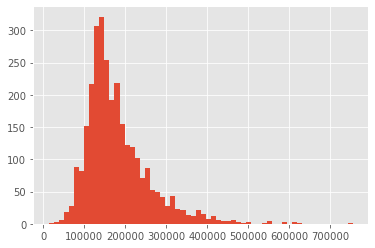

In [9]:
AH['SalePrice'].hist(bins=60);

Видим, что справа есть 8 едениц домов, которые очень дорогие, на них не действуют обычные правила, это выбросы. Очень большая площадь на промежутке - 100 000 - 300 000, и мы видим, что большинство домов располагаются на значении 160 000 

## Посмотрим график для логорифмов цен

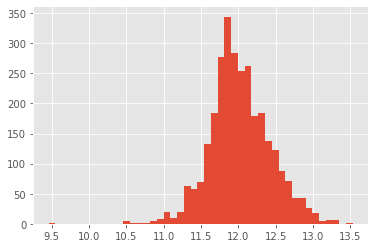

In [10]:
np.log(AH['SalePrice']).hist(bins=45);

Мы делаем это для преобразования в симметрию, нормальное распределение.

In [11]:
from scipy.stats.kde import gaussian_kde

from numpy import linspace, hstack
from pylab import plot, show, hist

Сумма гладких функций - всегда гладкая, ядерная оценка плотности

# Ящики с усами

Это упрощенная гистограмма, 

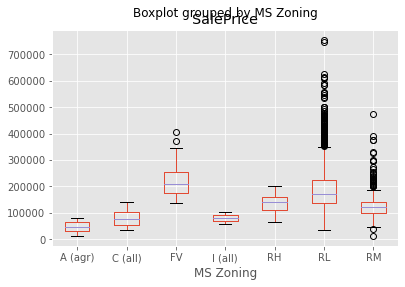

In [12]:
ax = AH.boxplot(column='SalePrice', by='MS Zoning')


Окружение дома влиет на его цену
Сель-хоз дешевле

In [13]:
AH['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

Видим, что две зоны очень малы и делать какие-то выводы не понятно.

# Города России 1959 г. перепись населения


In [14]:
town = pd.read_csv('town_1959_2.csv')
town.head()

,номер,город,население
0,1,Москва,5046.0
1,2,Санкт-Петербург,3003.0
2,3,Нижний_Новгород,941.0
3,4,Новосибирск,885.0
4,5,Самара,806.0


Какое население типичного города России в 1959 году? В первую очередь мы должны понять что такое "Типичный". Ниже мы увидим mean равный 52 тысячи, но это еще не полный ответ, потому что существуют выбросы в роли Москвы и Санкт-петербурга

In [15]:
town.describe()

,население
count,1004.000000
mean,52.925199
std,204.885662
min,0.100000
25%,10.700000
50%,19.250000
75%,37.975000
max,5046.000000


In [16]:
town_2 = town.iloc[2:1004,:]
town_2.describe()

#убираем выбросы

,население
count,1002.000000
mean,44.997904
std,91.645867
min,0.100000
25%,10.700000
50%,19.150000
75%,37.550000
max,941.000000


Видим, что среднее уменьшилосб на 20%, а также, что 75% имеет меньшее количество населения, чем среднее. Если у вас есть выбросы, то лучше ориентироваться на медиану

82% меньше типичного, можно увидеть это здесь

In [17]:
len(town[town['население'] < 52.925199])/len(town)

0.8237051792828686

<AxesSubplot:>

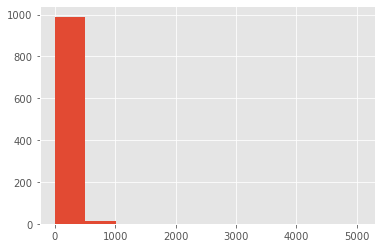

In [18]:
town[u'население'].hist()

Нормализируем данные с помощью логорифма

In [19]:
x = np.log10(town[u'население'])

<AxesSubplot:>

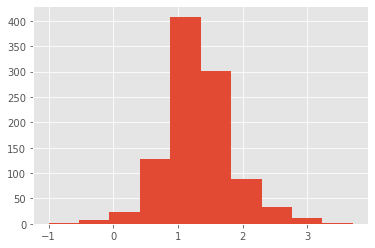

In [20]:
pd.Series(x).hist()

На гистограмме ниже видим выбросы справа это Москва и Питер, здесь это наглядно можно увидеть, также есть выброс слева

<AxesSubplot:>

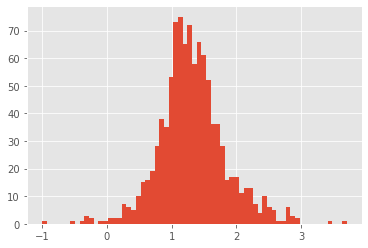

In [21]:
pd.Series(x).hist(bins=65)


1.Межквартирный размах - Q3 - Q1 

2.Max-Min

3.Формула отклонения

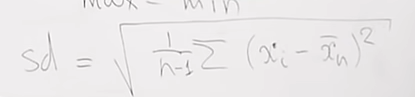


# Швейцарский банк и фальшивость банкнот

In [22]:
bank = pd.read_csv('swiss_bank_notes.csv')

bank.head()

,Unnamed: 0,Status,Length,Left,Right,Bottom,Top,Diagonal
0,1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
1,2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
2,3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
3,4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
4,5,genuine,215.0,129.6,129.7,10.4,7.7,141.8


Genuine - подлиная банкнота

То, как выглядила банкнота

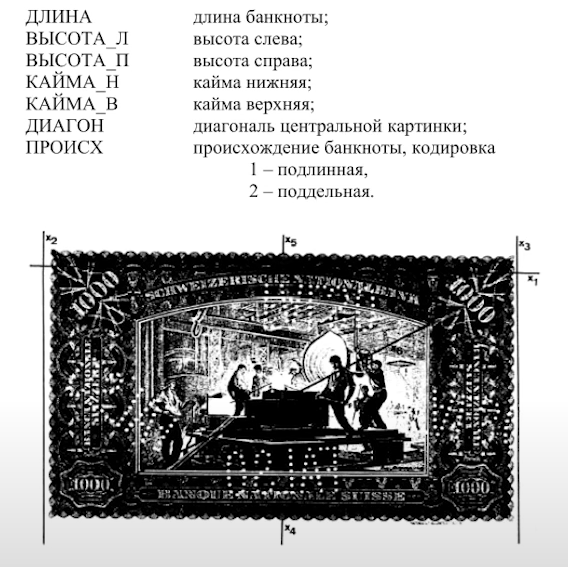

In [24]:
bank.describe()

,Unnamed: 0,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,57.879185,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,1.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,50.750000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,100.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,150.250000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,200.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


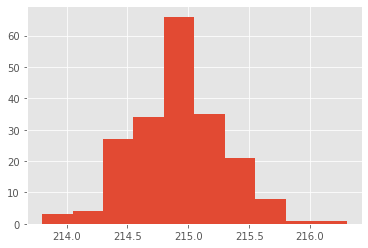

In [25]:
bank['Length'].hist();

Гистограмка для длинны

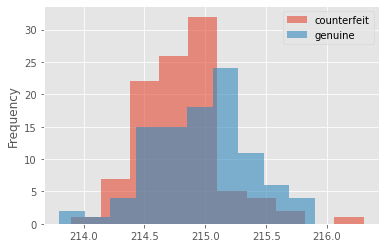

In [27]:
bank.groupby('Status')['Length'].plot.hist(alpha=0.6)
plt.legend();

Здесь мы сравниваем длины подлиных и не подлиных купюр

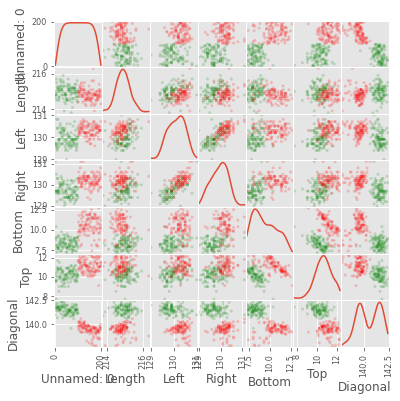

In [30]:
from pandas.plotting import scatter_matrix
colors = {'genuine': 'green', 'counterfeit': 'red'}

scatter_matrix(bank,
              figsize=(6,6),
              diagonal='kde',
              c = bank['Status'].replace(colors),
              alpha=0.2,
              );

Какие переменные будут играть большую роль, видим что это Диагональ, также значение Bottom

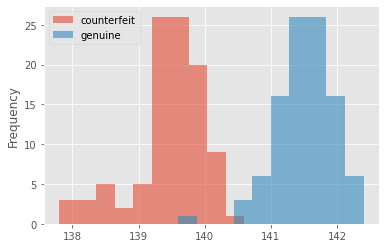

In [32]:
bank.groupby('Status')['Diagonal'].plot.hist(alpha=0.6)
plt.legend(loc='upper left');

Вот, появился инструмент для различия фальшивок (140.5 будет примерно 2 ошибки (пересечения))

<AxesSubplot:xlabel='Top', ylabel='Bottom'>

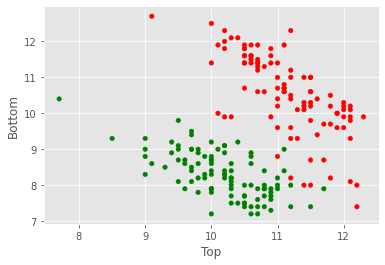

In [33]:
bank.plot.scatter(x='Top', y='Bottom', c=bank['Status'].replace(colors))

Построил также Скеттр для Bottom. Классный поинт про информативность. и необходимость изобретения фичей(нечто чего небыло в данных после чего наша задача станет проще)